<h1 style="text-align: center; color: purple;" markdown="1">Econ 320: Python Assignment 3 </h1>

<h2 style="text-align: center; color: #012169" markdown="1">Multicolinearity detection and output presentation </h2>
<h2 style="text-align: center; color: #012169" markdown="1">Zhou Fang</h2>



## Package setup

In [1]:
# Import necessary packages here
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as scs
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
# for the VIF
import statsmodels.stats.outliers_influence as smo
import patsy as pt

## Initial setup and correlation matrix

Using the data `gpa1` from the Wooldridge package, create two new variables  

$$x = 3+ ACT*2$$ 

$$z=ACT+2*hsGPA$$

Create a correlation matrix of `colGPA`, `hsGPA`, `ACT`, `x`, `z`, and a correlation matrix graph

What can you say about the correlation matrix and the graphs? 


In [2]:
# load the data
gpa1 = woo.dataWoo('gpa1')

# Generate the variables x and z as part of the data gpa1
gpa1['x']= 3+2*gpa1['ACT']
gpa1['z']= gpa1['ACT']+2*gpa1['hsGPA']

# correlation matrix 

cormat = gpa1[['colGPA','hsGPA','ACT','x','z']]

cormat.corr().round(decimals=2)

,colGPA,hsGPA,ACT,x,z
colGPA,1.00,0.41,0.21,0.21,0.27
hsGPA,0.41,1.00,0.35,0.35,0.52
ACT,0.21,0.35,1.00,1.00,0.98
x,0.21,0.35,1.00,1.00,0.98
z,0.27,0.52,0.98,0.98,1.00


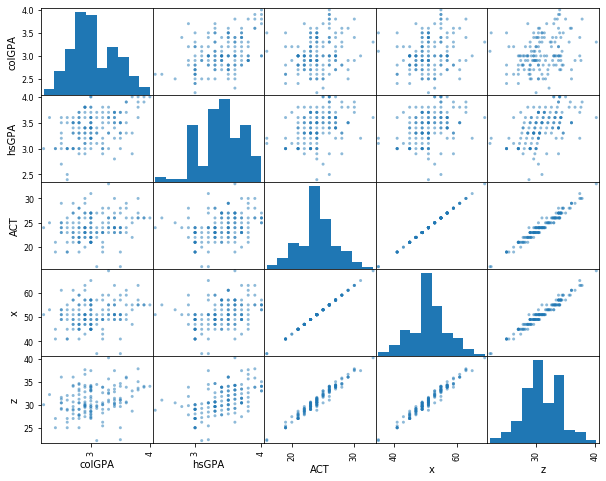

In [3]:
# Correlation graphs
pd.plotting.scatter_matrix(cormat, alpha=0.5, figsize=(10, 8));

## Run the following three regressions and show them all together in a nice looking table.  

$$colGPA=\beta_0 + \beta_1hsGPA + \beta_2ACT + u $$

$$colGPA=\beta_0 + \beta_1hsGPA + \beta_2ACT + + \beta_3x + \beta_4z + u $$

$$colGPA=\beta_0 + \beta_1hsGPA + \beta_2ACT + \beta_3age+ \beta_4alcohol + u $$


Make a summary of the second regression, look at it. ( Then comment this code by using #)
Then make sure that the output of the code for it doesn't show, this is just for you to see how R reacts to the multicolinearity problem. EXPLAIN what happened in the output and why.  
Put both results in a nice looking table. 

In [4]:
# model 1
model1 = smf.ols(formula = 'colGPA ~ hsGPA + ACT', data = gpa1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           1.53e-06
Time:                        11:23:43   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2863      0.341      3.774      0.000       0.612       1.960
hsGPA          0.4535      0.096      4.733      0.000       0.264       0.643
ACT            0.0094      0.011      0.875      0.383      -0.012       0.031
==============================================================================
Omnibus:                        3.056   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.469
Skew:                           0.199   Prob(JB):                        0.291
Kurtosis:                       2.488   Cond. No.                         298.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#model 2

model2 = smf.ols(formula = 'colGPA ~ hsGPA + ACT + x + z', data = gpa1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colGPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     14.78
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           1.53e-06
Time:                        11:23:44   Log-Likelihood:                -46.573
No. Observations:                 141   AIC:                             99.15
Df Residuals:                     138   BIC:                             108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4825      0.104      4.661      0.000       0.278       0.687
hsGPA          0.3266      0.040      8.203      0.000       0.248       0.405
ACT           -0.5898      0.117     -5.063      0.000      -0.820      -0.359
x              0.2679      0.080      3.368      0.001       0.111       0.425
z              0.0634      0.054      1.165      0.246      -0.044       0.171
==============================================================================
Omnibus:                        3.056   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.469
Skew:                           0.199   Prob(JB):                        0.291
Kurtosis:                       2.488   Cond. No.                     1.20e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [6]:
# model 3
model3 = smf.ols(formula = 'colGPA ~ hsGPA + ACT + age + alcohol', data = gpa1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colGPA   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     7.735
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           1.20e-05
Time:                        11:23:44   Log-Likelihood:                -45.805
No. Observations:                 141   AIC:                             101.6
Df Residuals:                     136   BIC:                             116.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6016      0.667      0.902      0.369      -0.718       1.921
hsGPA          0.4862      0.100      4.873      0.000       0.289       0.683
ACT            0.0086      0.011      0.778      0.438      -0.013       0.030
age            0.0278      0.023      1.182      0.239      -0.019       0.074
alcohol        0.0074      0.021      0.346      0.730      -0.035       0.050
==============================================================================
Omnibus:                        3.772   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.602
Skew:                           0.159   Prob(JB):                        0.272
Kurtosis:                       2.416   Cond. No.                         753.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ⚠️ After looking at the results from your regressions, Model 2 presented a particular warning.  What does it say? 

### Warning from model2 says that "Standard Errors assume that the covariance matrix of the errors is correctly specified." suggests there is multicolinearity in this case.

## Given the multicolinearity concern (because of our added variables), let's ignore that model and now put the results from Model 1 and 3 into a stargazer table. 


In [7]:
# use stargazer to view the OLS outputs 
st=Stargazer([model1,model3])
st.rename_covariates({'hsGPA':'High SchoolGPA'})
st.covariate_order(['hsGPA','ACT','age','alcohol'])
from IPython.core.display import HTML
HTML(st.render_html())        

## Calculate VIF and prove OLS properties

* Evaluate the vif of model1 and model2. 
* See what happens to model2 when you run the code. Explain.

In [8]:
# calculate VIF :
XX = gpa1[['colGPA','hsGPA','ACT']].copy()
XX['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = XX.columns
vif["VIF"] = [smo.variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]

vif

,variables,VIF
0,colGPA,1.214213
1,hsGPA,1.320178
2,ACT,1.142120
3,Intercept,156.017430


In [9]:
# calculate VIF :
XX = gpa1[['colGPA','hsGPA','ACT','x','z']].copy()
XX['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = XX.columns
vif["VIF"] = [smo.variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]

vif

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,colGPA,1.214213
1,hsGPA,inf
2,ACT,inf
3,x,inf
4,z,inf
5,Intercept,0.000000


## Demonstrate that the residuals of model1 add up to zero. What does that mean? EXPLAIN. 

In [10]:
#find the sum of the residulas in model 1
print( 'Sum of residuals Model 1 :', abs(round(model1.resid.sum(),3)))


Sum of residuals Model 1 : 0.0


Residuals of model1 adding up to zero means the model is "best fit" to the true values with minimal variability.

## Demonstrate that the $R^2$ of a regression of the residuals of model1 on the original regressors must be zero. What does this mean? EXPLAIN.

In [11]:
# run regression of residuals on the regressors
gpa1['u_hat'] = model1.resid
reg = smf.ols(formula = 'u_hat ~ hsGPA + ACT', data = gpa1).fit()
print( 'R2 of residuals Model 1 :', abs(round(reg.rsquared,3)))

R2 of residuals Model 1 : 0.0


The R-squared of a regression of residuals is 0 means that the error has no correlation with the independent variables.

<style>
div.gray { background-color:#dbdbdb; border-radius: 5px; padding: 20px;}
</style>
<div class = "gray">

**Packages used in this document**

`wooldridge`
`matplot.lib`
`pandas`
`numpy` 
`seaborn`
    

</div>

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON220 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;